In [74]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split, RandomizedSearchCV

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import xgboost as xgb
import tensorflow as tf
from tensorflow.keras import layers

from sklearn.utils import shuffle


# Reading and Preprocessing

In [4]:
dfRaw = pd.read_csv('/Users/austi/Documents/QTW/Case Study 7/final_project(5).csv')
print(dfRaw.head())

         x0        x1         x2        x3        x4         x5         x6  \
0 -0.166563 -3.961588   4.621113  2.481908 -1.800135   0.804684   6.718751   
1 -0.149894 -0.585676  27.839856  4.152333  6.426802  -2.426943  40.477058   
2 -0.321707 -1.429819  12.251561  6.586874 -5.304647 -11.311090  17.812850   
3 -0.245594  5.076677 -24.149632  3.637307  6.505811   2.290224 -35.111751   
4 -0.273366  0.306326 -11.352593  1.676758  2.928441  -0.616824 -16.505817   

          x7        x8        x9  ...        x41       x42       x43  \
0 -14.789997 -1.040673 -4.204950  ...  -1.497117  5.414063 -2.325655   
1  -6.725709  0.896421  0.330165  ...  36.292790  4.490915  0.762561   
2  11.060572  5.325880 -2.632984  ...  -0.368491  9.088864 -0.689886   
3 -18.913592 -0.337041 -5.568076  ...  15.691546 -7.467775  2.940789   
4  27.532281  1.199715 -4.309105  ... -13.911297 -5.229937  1.783928   

        x44       x45        x46       x47       x48        x49  y  
0  1.674827 -0.264332  60.781

In [5]:
print(dfRaw.describe())

                  x0             x1             x2             x3  \
count  159974.000000  159975.000000  159962.000000  159963.000000   
mean       -0.001028       0.001358      -1.150145      -0.024637   
std         0.371137       6.340632      13.273480       8.065032   
min        -1.592635     -26.278302     -59.394048     -35.476594   
25%        -0.251641      -4.260973     -10.166536      -5.454438   
50%        -0.002047       0.004813      -1.340932      -0.031408   
75%         0.248532       4.284220       7.871676       5.445179   
max         1.600849      27.988178      63.545653      38.906025   

                  x4             x5             x6             x7  \
count  159974.000000  159963.000000  159974.000000  159973.000000   
mean       -0.000549       0.013582      -1.670670      -7.692795   
std         6.382293       7.670076      19.298665      30.542264   
min       -28.467536     -33.822988     -86.354483    -181.506976   
25%        -4.313118      -5.1481

In [6]:
print(dfRaw.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160000 entries, 0 to 159999
Data columns (total 51 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   x0      159974 non-null  float64
 1   x1      159975 non-null  float64
 2   x2      159962 non-null  float64
 3   x3      159963 non-null  float64
 4   x4      159974 non-null  float64
 5   x5      159963 non-null  float64
 6   x6      159974 non-null  float64
 7   x7      159973 non-null  float64
 8   x8      159979 non-null  float64
 9   x9      159970 non-null  float64
 10  x10     159957 non-null  float64
 11  x11     159970 non-null  float64
 12  x12     159964 non-null  float64
 13  x13     159969 non-null  float64
 14  x14     159966 non-null  float64
 15  x15     159965 non-null  float64
 16  x16     159974 non-null  float64
 17  x17     159973 non-null  float64
 18  x18     159960 non-null  float64
 19  x19     159965 non-null  float64
 20  x20     159962 non-null  float64
 21  x21     15

In [7]:
df = dfRaw.copy()

In [8]:
categorical_columns = df.select_dtypes(include = ['object']).columns

for col in categorical_columns:
    unique_values = df[col].unique()
    unique_count = len(unique_values)
    print(f"Unique values in {col} ({unique_count} unique values): \n{unique_values}\n\n")

Unique values in x24 (4 unique values): 
['euorpe' 'asia' 'america' nan]


Unique values in x29 (13 unique values): 
['July' 'Aug' 'Jun' 'May' 'sept.' 'Apr' 'Nov' 'Oct' nan 'Mar' 'Feb' 'Dev'
 'January']


Unique values in x30 (6 unique values): 
['tuesday' 'wednesday' 'thurday' 'monday' 'friday' nan]


Unique values in x32 (13 unique values): 
['0.0%' '-0.02%' '-0.01%' '0.01%' '-0.03%' '0.02%' '-0.0%' '-0.04%' nan
 '0.03%' '0.04%' '-0.05%' '0.05%']


Unique values in x37 (129199 unique values): 
['$1313.96' '$1962.78' '$430.47' ... '$1588.65' '$439.21' '$-1229.34']




In [9]:
for i in df:
    if df[i].isnull().sum() > 0:
        print(i,':',df[i].isnull().sum(),'missing')
        print(i,':',df[i].isnull().sum() / len(df),'%')

x0 : 26 missing
x0 : 0.0001625 %
x1 : 25 missing
x1 : 0.00015625 %
x2 : 38 missing
x2 : 0.0002375 %
x3 : 37 missing
x3 : 0.00023125 %
x4 : 26 missing
x4 : 0.0001625 %
x5 : 37 missing
x5 : 0.00023125 %
x6 : 26 missing
x6 : 0.0001625 %
x7 : 27 missing
x7 : 0.00016875 %
x8 : 21 missing
x8 : 0.00013125 %
x9 : 30 missing
x9 : 0.0001875 %
x10 : 43 missing
x10 : 0.00026875 %
x11 : 30 missing
x11 : 0.0001875 %
x12 : 36 missing
x12 : 0.000225 %
x13 : 31 missing
x13 : 0.00019375 %
x14 : 34 missing
x14 : 0.0002125 %
x15 : 35 missing
x15 : 0.00021875 %
x16 : 26 missing
x16 : 0.0001625 %
x17 : 27 missing
x17 : 0.00016875 %
x18 : 40 missing
x18 : 0.00025 %
x19 : 35 missing
x19 : 0.00021875 %
x20 : 38 missing
x20 : 0.0002375 %
x21 : 29 missing
x21 : 0.00018125 %
x22 : 27 missing
x22 : 0.00016875 %
x23 : 47 missing
x23 : 0.00029375 %
x24 : 28 missing
x24 : 0.000175 %
x25 : 22 missing
x25 : 0.0001375 %
x26 : 36 missing
x26 : 0.000225 %
x27 : 30 missing
x27 : 0.0001875 %
x28 : 35 missing
x28 : 0.0002187

### Imputing categorical data

In [10]:
columns_to_encode = ['x24','x29','x30']
for i in columns_to_encode:
    df[i] = df[i].fillna('unknown')

In [11]:
missingData = []
for i in df:
    if df[i].isnull().sum() > 0:
        print(i,':',df[i].isnull().sum(),'missing')
        print(i,':',df[i].isnull().sum() / len(df),'%')
        missingData.append(i)

x0 : 26 missing
x0 : 0.0001625 %
x1 : 25 missing
x1 : 0.00015625 %
x2 : 38 missing
x2 : 0.0002375 %
x3 : 37 missing
x3 : 0.00023125 %
x4 : 26 missing
x4 : 0.0001625 %
x5 : 37 missing
x5 : 0.00023125 %
x6 : 26 missing
x6 : 0.0001625 %
x7 : 27 missing
x7 : 0.00016875 %
x8 : 21 missing
x8 : 0.00013125 %
x9 : 30 missing
x9 : 0.0001875 %
x10 : 43 missing
x10 : 0.00026875 %
x11 : 30 missing
x11 : 0.0001875 %
x12 : 36 missing
x12 : 0.000225 %
x13 : 31 missing
x13 : 0.00019375 %
x14 : 34 missing
x14 : 0.0002125 %
x15 : 35 missing
x15 : 0.00021875 %
x16 : 26 missing
x16 : 0.0001625 %
x17 : 27 missing
x17 : 0.00016875 %
x18 : 40 missing
x18 : 0.00025 %
x19 : 35 missing
x19 : 0.00021875 %
x20 : 38 missing
x20 : 0.0002375 %
x21 : 29 missing
x21 : 0.00018125 %
x22 : 27 missing
x22 : 0.00016875 %
x23 : 47 missing
x23 : 0.00029375 %
x25 : 22 missing
x25 : 0.0001375 %
x26 : 36 missing
x26 : 0.000225 %
x27 : 30 missing
x27 : 0.0001875 %
x28 : 35 missing
x28 : 0.00021875 %
x31 : 39 missing
x31 : 0.00024

In [12]:
df['x37'] = df['x37'].str.replace('$','').astype(float)
df['x32'] = df['x32'].str.replace('%','').astype(float)

In [13]:
for i in missingData:
    df[i].fillna(df[i].median(),inplace=True)
for i in df:
    if df[i].isnull().sum() > 0:
        print(i, ':', df[i].isnull().sum(), 'missing')

In [14]:
df = pd.get_dummies(df, columns=columns_to_encode, prefix=columns_to_encode)

# Model Setup

In [15]:
X = df.drop(columns='y')
y = df['y']
print(df.shape)
print(X.shape)
print(y.shape)

(160000, 71)
(160000, 70)
(160000,)


In [16]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(128000, 70)
(32000, 70)
(128000,)
(32000,)


# Score Functions

In [18]:
value_counts = df['y'].value_counts()
print(value_counts)
lowestTotalCost = value_counts[0] * 40 + value_counts[1] * 100
print(lowestTotalCost)

y
0    95803
1    64197
Name: count, dtype: int64
10251820


In [19]:
def threshold_test(probabilities, th):
    return [1 if prob >= th else 0 for prob in probabilities]
def cost_score(confMatrix):
    return (confMatrix[0][1] * 40 + confMatrix[1][0] * 100) * 5
def find_cost(yProb):
    thresholds = np.linspace(0,1,101)
    lowestTh = 1
    lowestCost = lowestTotalCost
    for t in thresholds:
        conf_matrix = confusion_matrix(y_test, threshold_test(yProb,t))
        cost  = cost_score(conf_matrix)
        if cost < lowestCost:
            lowestCost = cost
            lowestTh = t
            lowestCM = conf_matrix
        print('Threshold:',t)
        print('Total Money Lost:',cost)
        print('==================')
    return lowestCost, lowestTh, lowestCM

# Random Forest
### Cost: 731,300

In [20]:
params = {'criterion':['gini','entropy'],
          'max_depth':[5,10,15,20,30,40],
          'min_samples_split':[16,12,10,8,6],
          'min_samples_leaf':[6,5,4,3,2],
          'max_features':[5,10,15,20,30,40],
          'class_weight':[None,'balanced','balanced_subsample']}
rfModel = RandomForestClassifier(n_estimators=10)

searchModel = RandomizedSearchCV(rfModel,
                                 params,
                                 n_iter=20,
                                 cv=5,
                                 n_jobs=-1,
                                 verbose=True)
searchModel.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(n_estimators=10),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'class_weight': [None, 'balanced',
                                                         'balanced_subsample'],
                                        'criterion': ['gini', 'entropy'],
                                        'max_depth': [5, 10, 15, 20, 30, 40],
                                        'max_features': [5, 10, 15, 20, 30, 40],
                                        'min_samples_leaf': [6, 5, 4, 3, 2],
                                        'min_samples_split': [16, 12, 10, 8,
                                                              6]},
                   verbose=True)

In [21]:
print(searchModel.best_score_)
best_params = searchModel.best_params_
print(best_params)

0.9195375
{'min_samples_split': 16, 'min_samples_leaf': 6, 'max_features': 30, 'max_depth': 20, 'criterion': 'entropy', 'class_weight': 'balanced'}


In [22]:
rfModel = RandomForestClassifier(n_estimators=50, **best_params)
rfModel.fit(X_train, y_train)
rfProb = rfModel.predict_proba(X_test)[:,1]

In [23]:
print(find_cost(rfProb))

Threshold: 0.0
Total Money Lost: 3833000
Threshold: 0.01
Total Money Lost: 3613400
Threshold: 0.02
Total Money Lost: 3375000
Threshold: 0.03
Total Money Lost: 3148000
Threshold: 0.04
Total Money Lost: 2923500
Threshold: 0.05
Total Money Lost: 2705100
Threshold: 0.06
Total Money Lost: 2526400
Threshold: 0.07
Total Money Lost: 2355200
Threshold: 0.08
Total Money Lost: 2205200
Threshold: 0.09
Total Money Lost: 2060500
Threshold: 0.1
Total Money Lost: 1943000
Threshold: 0.11
Total Money Lost: 1835100
Threshold: 0.12
Total Money Lost: 1732800
Threshold: 0.13
Total Money Lost: 1641100
Threshold: 0.14
Total Money Lost: 1547500
Threshold: 0.15
Total Money Lost: 1466800
Threshold: 0.16
Total Money Lost: 1399100
Threshold: 0.17
Total Money Lost: 1330400
Threshold: 0.18
Total Money Lost: 1269800
Threshold: 0.19
Total Money Lost: 1215200
Threshold: 0.2
Total Money Lost: 1164100
Threshold: 0.21
Total Money Lost: 1121400
Threshold: 0.22
Total Money Lost: 1078300
Threshold: 0.23
Total Money Lost: 103

# Logistic Regression
### Cost: 2,788,100

In [24]:
logModel = LogisticRegression()

In [25]:
params = {'penalty':['l1','l2','elasticnet'],
          'C':[0.001,0.01,0.1,1,10,100],
          'l1_ratio':[0,0.01,0.25,0.5,0.75,1],
          'solver':['lbfgs','sag','saga','newton-cholesky'],
          'class_weight':[None,'balanced']}

logSearchModel = RandomizedSearchCV(logModel,
                                 params,
                                 n_iter=20,
                                 cv=5,
                                 n_jobs=-1,
                                 verbose=True)
logSearchModel.fit(X,y)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\austi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
60 fits failed out of a total of 100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\austi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\austi\anaconda3\lib\site-packages\sklearn\base.py", line 1151, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\austi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1168, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual

RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20, n_jobs=-1,
                   param_distributions={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                                        'class_weight': [None, 'balanced'],
                                        'l1_ratio': [0, 0.01, 0.25, 0.5, 0.75,
                                                     1],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['lbfgs', 'sag', 'saga',
                                                   'newton-cholesky']},
                   verbose=True)

In [26]:
print(logSearchModel.best_score_)
best_params = logSearchModel.best_params_
print(best_params)

0.70816875
{'solver': 'lbfgs', 'penalty': 'l2', 'l1_ratio': 0.25, 'class_weight': 'balanced', 'C': 0.01}


In [27]:
logModel = LogisticRegression(**best_params)
logModel.fit(X_train,y_train)
logProb = logModel.predict_proba(X_test)[:,1]

C:\Users\austi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:1171: UserWarning: l1_ratio parameter is only used when penalty is 'elasticnet'. Got (penalty=l2)
  warnings.warn(


In [28]:
print(find_cost(logProb))

Threshold: 0.0
Total Money Lost: 3833000
Threshold: 0.01
Total Money Lost: 3833000
Threshold: 0.02
Total Money Lost: 3832800
Threshold: 0.03
Total Money Lost: 3832700
Threshold: 0.04
Total Money Lost: 3834200
Threshold: 0.05
Total Money Lost: 3834200
Threshold: 0.06
Total Money Lost: 3832300
Threshold: 0.07
Total Money Lost: 3831900
Threshold: 0.08
Total Money Lost: 3828100
Threshold: 0.09
Total Money Lost: 3826500
Threshold: 0.1
Total Money Lost: 3818500
Threshold: 0.11
Total Money Lost: 3812700
Threshold: 0.12
Total Money Lost: 3799900
Threshold: 0.13
Total Money Lost: 3780700
Threshold: 0.14
Total Money Lost: 3757000
Threshold: 0.15
Total Money Lost: 3736000
Threshold: 0.16
Total Money Lost: 3707400
Threshold: 0.17
Total Money Lost: 3678300
Threshold: 0.18
Total Money Lost: 3634200
Threshold: 0.19
Total Money Lost: 3594200
Threshold: 0.2
Total Money Lost: 3549000
Threshold: 0.21
Total Money Lost: 3504200
Threshold: 0.22
Total Money Lost: 3450700
Threshold: 0.23
Total Money Lost: 339

# XG Boost
### Cost: 634,600
could use some tuning and more training rounds

In [29]:
dTrain = xgb.DMatrix(X_train, label=y_train)
dTest = xgb.DMatrix(X_test, label=y_test)
evalList = [(dTest,'test'),(dTrain,'train')]

In [30]:
num_round = 1500
params = {'objective':'binary:logistic',
          'max_depth':6,
          'eta':0.05}

In [31]:
out = xgb.cv(params=params,
             dtrain=dTrain,
             num_boost_round=num_round,
             nfold=5,
             verbose_eval=True,
             early_stopping_rounds=5)

[0]	train-logloss:0.65518+0.00048	test-logloss:0.65556+0.00173
[1]	train-logloss:0.63851+0.00053	test-logloss:0.63924+0.00184
[2]	train-logloss:0.62292+0.00047	test-logloss:0.62389+0.00195
[3]	train-logloss:0.60826+0.00071	test-logloss:0.60953+0.00197
[4]	train-logloss:0.59526+0.00054	test-logloss:0.59684+0.00229
[5]	train-logloss:0.58268+0.00077	test-logloss:0.58460+0.00231
[6]	train-logloss:0.57083+0.00051	test-logloss:0.57290+0.00240
[7]	train-logloss:0.55957+0.00067	test-logloss:0.56200+0.00236
[8]	train-logloss:0.54944+0.00057	test-logloss:0.55206+0.00239
[9]	train-logloss:0.53931+0.00043	test-logloss:0.54214+0.00249
[10]	train-logloss:0.53008+0.00072	test-logloss:0.53322+0.00234
[11]	train-logloss:0.52134+0.00080	test-logloss:0.52469+0.00223
[12]	train-logloss:0.51283+0.00103	test-logloss:0.51642+0.00207
[13]	train-logloss:0.50461+0.00101	test-logloss:0.50841+0.00206
[14]	train-logloss:0.49681+0.00089	test-logloss:0.50086+0.00232
[15]	train-logloss:0.48946+0.00123	test-logloss:0.

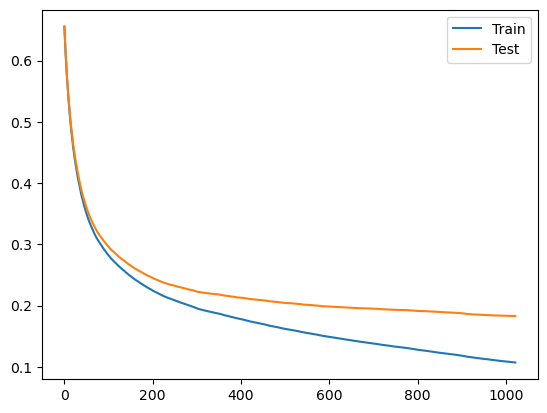

In [32]:
plt.plot(out['train-logloss-mean'],label='Train')
plt.plot(out['test-logloss-mean'],label='Test')
plt.legend()
plt.show()

In [33]:
xgbModel = xgb.train(params=params,
                     dtrain=dTrain,
                     num_boost_round=num_round,
                     verbose_eval=True,
                     early_stopping_rounds=5,
                     evals=evalList)

[0]	test-logloss:0.65552	train-logloss:0.65527
[1]	test-logloss:0.63919	train-logloss:0.63845
[2]	test-logloss:0.62399	train-logloss:0.62281
[3]	test-logloss:0.61019	train-logloss:0.60846
[4]	test-logloss:0.59812	train-logloss:0.59608
[5]	test-logloss:0.58547	train-logloss:0.58307
[6]	test-logloss:0.57402	train-logloss:0.57115
[7]	test-logloss:0.56349	train-logloss:0.56036
[8]	test-logloss:0.55385	train-logloss:0.55043
[9]	test-logloss:0.54462	train-logloss:0.54072
[10]	test-logloss:0.53513	train-logloss:0.53096
[11]	test-logloss:0.52635	train-logloss:0.52190
[12]	test-logloss:0.51880	train-logloss:0.51410
[13]	test-logloss:0.51158	train-logloss:0.50650
[14]	test-logloss:0.50373	train-logloss:0.49844
[15]	test-logloss:0.49670	train-logloss:0.49115
[16]	test-logloss:0.48933	train-logloss:0.48353
[17]	test-logloss:0.48350	train-logloss:0.47755
[18]	test-logloss:0.47721	train-logloss:0.47090
[19]	test-logloss:0.47165	train-logloss:0.46512
[20]	test-logloss:0.46539	train-logloss:0.45870
[2

In [34]:
xgProb = xgbModel.predict(dTest)
print(xgProb)

[0.14111528 0.2910394  0.9985012  ... 0.42168194 0.98688984 0.00682637]


In [35]:
print(find_cost(xgProb))

Threshold: 0.0
Total Money Lost: 3833000
Threshold: 0.01
Total Money Lost: 2319100
Threshold: 0.02
Total Money Lost: 1897500
Threshold: 0.03
Total Money Lost: 1634400
Threshold: 0.04
Total Money Lost: 1459600
Threshold: 0.05
Total Money Lost: 1328200
Threshold: 0.06
Total Money Lost: 1230300
Threshold: 0.07
Total Money Lost: 1150200
Threshold: 0.08
Total Money Lost: 1074800
Threshold: 0.09
Total Money Lost: 1024600
Threshold: 0.1
Total Money Lost: 975500
Threshold: 0.11
Total Money Lost: 933800
Threshold: 0.12
Total Money Lost: 891500
Threshold: 0.13
Total Money Lost: 857400
Threshold: 0.14
Total Money Lost: 824000
Threshold: 0.15
Total Money Lost: 801400
Threshold: 0.16
Total Money Lost: 775900
Threshold: 0.17
Total Money Lost: 751700
Threshold: 0.18
Total Money Lost: 734600
Threshold: 0.19
Total Money Lost: 719400
Threshold: 0.2
Total Money Lost: 709500
Threshold: 0.21
Total Money Lost: 695900
Threshold: 0.22
Total Money Lost: 690900
Threshold: 0.23
Total Money Lost: 683200
Threshold

# Neural Net
### Cost: 360,600

In [36]:
print(X_train.shape)

(128000, 70)


In [37]:
X_train_NN, X_val_NN, y_train_NN, y_val_NN = train_test_split(X_train,
                                                              y_train,
                                                              test_size=0.1)

In [38]:
callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                            patience=5)

nnModel = tf.keras.Sequential()
nnModel.add(tf.keras.Input(shape=(70,)))
nnModel.add(layers.Dense(128,activation='relu'))
nnModel.add(layers.Dense(128,activation='relu'))
nnModel.add(layers.Dropout(0.3))
nnModel.add(layers.Dense(64,activation='relu'))
nnModel.add(layers.Dense(64,activation='relu'))
nnModel.add(layers.Dropout(0.3))
nnModel.add(layers.Dense(1,activation='sigmoid'))

In [39]:
nnModel.compile(optimizer=tf.keras.optimizers.Adam(),
                loss='binary_crossentropy',
                metrics=['accuracy'])
history = nnModel.fit(X_train_NN,
                      y_train_NN,
                      epochs=1000,
                      batch_size=32,
                      callbacks=[callback],
                      validation_data=[X_val_NN,y_val_NN])

Epoch 1/1000
3600/3600 [==============================] - 11s 3ms/step - loss: 0.3231 - accuracy: 0.8616 - val_loss: 0.2089 - val_accuracy: 0.9198
Epoch 2/1000
3600/3600 [==============================] - 11s 3ms/step - loss: 0.2069 - accuracy: 0.9215 - val_loss: 0.1677 - val_accuracy: 0.9346
Epoch 3/1000
3600/3600 [==============================] - 11s 3ms/step - loss: 0.1731 - accuracy: 0.9368 - val_loss: 0.1471 - val_accuracy: 0.9457
Epoch 4/1000
3600/3600 [==============================] - 12s 3ms/step - loss: 0.1558 - accuracy: 0.9444 - val_loss: 0.1443 - val_accuracy: 0.9468
Epoch 5/1000
3600/3600 [==============================] - 11s 3ms/step - loss: 0.1429 - accuracy: 0.9507 - val_loss: 0.1323 - val_accuracy: 0.9538
Epoch 6/1000
3600/3600 [==============================] - 11s 3ms/step - loss: 0.1340 - accuracy: 0.9538 - val_loss: 0.1233 - val_accuracy: 0.9557
Epoch 7/1000
3600/3600 [==============================] - 11s 3ms/step - loss: 0.1271 - accuracy: 0.9567 - val_loss: 0

In [40]:
print(nnModel.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               9088      
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_4 (Dense)             (None, 1)                 6

In [41]:
loss, acc = nnModel.evaluate(X_test,y_test)
print(acc)

1000/1000 [==============================] - 2s 2ms/step - loss: 0.1124 - accuracy: 0.9663
0.9662500023841858


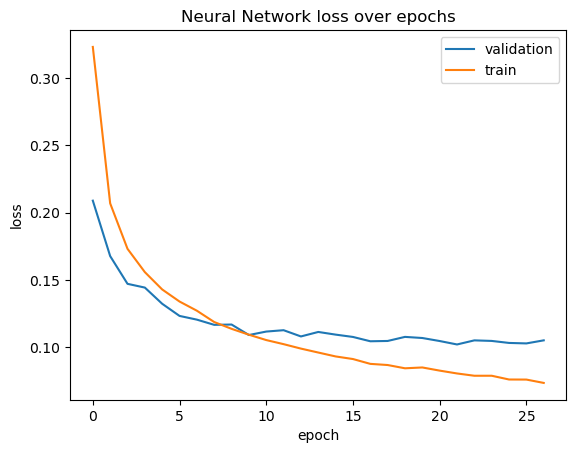

In [45]:
plt.plot(history.history['val_loss'],label='validation')
plt.plot(history.history['loss'],label='train')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.title('Neural Network loss over epochs')
plt.legend()
plt.show()

In [43]:
nnProb = nnModel.predict(X_test)

1000/1000 [==============================] - 2s 2ms/step


In [44]:
find_cost(nnProb)

Threshold: 0.0
Total Money Lost: 3833000
Threshold: 0.01
Total Money Lost: 1426000
Threshold: 0.02
Total Money Lost: 889400
Threshold: 0.03
Total Money Lost: 642300
Threshold: 0.04
Total Money Lost: 524600
Threshold: 0.05
Total Money Lost: 453000
Threshold: 0.06
Total Money Lost: 416800
Threshold: 0.07
Total Money Lost: 395400
Threshold: 0.08
Total Money Lost: 384100
Threshold: 0.09
Total Money Lost: 371900
Threshold: 0.1
Total Money Lost: 363100
Threshold: 0.11
Total Money Lost: 361100
Threshold: 0.12
Total Money Lost: 356400
Threshold: 0.13
Total Money Lost: 352400
Threshold: 0.14
Total Money Lost: 350900
Threshold: 0.15
Total Money Lost: 350200
Threshold: 0.16
Total Money Lost: 352600
Threshold: 0.17
Total Money Lost: 354500
Threshold: 0.18
Total Money Lost: 358000
Threshold: 0.19
Total Money Lost: 360200
Threshold: 0.2
Total Money Lost: 357900
Threshold: 0.21
Total Money Lost: 360900
Threshold: 0.22
Total Money Lost: 362300
Threshold: 0.23
Total Money Lost: 363100
Threshold: 0.24
T

(350200,
 0.15,
 array([[18244,   921],
        [  332, 12503]], dtype=int64))

# Five Neural Nets with class weights
### Cost: 289900

In [67]:



total_samples = len(y_train_NN)
weight_for_class_0 = total_samples / (2 * np.sum(y_train_NN == 0))
weight_for_class_1 = total_samples / (2 * np.sum(y_train_NN == 1))

class_weights = {0: weight_for_class_0, 1: weight_for_class_1}

callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

num_models = 5

models = []

for _ in range(num_models):
    nnModel = tf.keras.Sequential()
    nnModel.add(tf.keras.Input(shape=(70,)))
    nnModel.add(layers.Dense(128, activation='relu'))
    nnModel.add(layers.Dense(128, activation='relu'))
    nnModel.add(layers.Dropout(0.3))
    nnModel.add(layers.Dense(64, activation='relu'))
    nnModel.add(layers.Dense(64, activation='relu'))
    nnModel.add(layers.Dropout(0.3))
    nnModel.add(layers.Dense(1, activation='sigmoid'))

    nnModel.compile(optimizer=tf.keras.optimizers.Adam(),
                    loss='binary_crossentropy',
                    metrics=['accuracy'])

    X_train_NN_shuffled, y_train_NN_shuffled = shuffle(X_train_NN, y_train_NN)

    history = nnModel.fit(X_train_NN_shuffled, y_train_NN_shuffled, epochs=1000, batch_size=32,
                          callbacks=[callback],
                          validation_data=(X_val_NN, y_val_NN), class_weight=class_weights)
    
    models.append(nnModel)

individual_probs = [model.predict(X_test) for model in models]

ensemble_probabilities = np.mean(individual_probs, axis=0)



Epoch 1/1000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.3236 - accuracy: 0.8612 - val_loss: 0.2040 - val_accuracy: 0.9203
Epoch 2/1000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.2058 - accuracy: 0.9222 - val_loss: 0.1651 - val_accuracy: 0.9372
Epoch 3/1000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.1750 - accuracy: 0.9365 - val_loss: 0.1558 - val_accuracy: 0.9428
Epoch 4/1000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.1589 - accuracy: 0.9438 - val_loss: 0.1348 - val_accuracy: 0.9530
Epoch 5/1000
3600/3600 [==============================] - 10s 3ms/step - loss: 0.1463 - accuracy: 0.9489 - val_loss: 0.1431 - val_accuracy: 0.9505
Epoch 6/1000
3600/3600 [==============================] - 11s 3ms/step - loss: 0.1389 - accuracy: 0.9525 - val_loss: 0.1262 - val_accuracy: 0.9572
Epoch 7/1000
3600/3600 [==============================] - 11s 3ms/step - loss: 0.1324 - accuracy: 0.9550 - val_loss: 0

In [73]:
find_cost(ensemble_probabilities)

Threshold: 0.0
Total Money Lost: 3833000
Threshold: 0.01
Total Money Lost: 2153400
Threshold: 0.02
Total Money Lost: 1268500
Threshold: 0.03
Total Money Lost: 897800
Threshold: 0.04
Total Money Lost: 738900
Threshold: 0.05
Total Money Lost: 655800
Threshold: 0.06
Total Money Lost: 601800
Threshold: 0.07
Total Money Lost: 563300
Threshold: 0.08
Total Money Lost: 531400
Threshold: 0.09
Total Money Lost: 507800
Threshold: 0.1
Total Money Lost: 487800
Threshold: 0.11
Total Money Lost: 471200
Threshold: 0.12
Total Money Lost: 457000
Threshold: 0.13
Total Money Lost: 440400
Threshold: 0.14
Total Money Lost: 426000
Threshold: 0.15
Total Money Lost: 412900
Threshold: 0.16
Total Money Lost: 402300
Threshold: 0.17
Total Money Lost: 392200
Threshold: 0.18
Total Money Lost: 380600
Threshold: 0.19
Total Money Lost: 370100
Threshold: 0.2
Total Money Lost: 360900
Threshold: 0.21
Total Money Lost: 353300
Threshold: 0.22
Total Money Lost: 345600
Threshold: 0.23
Total Money Lost: 342400
Threshold: 0.24


(289900,
 0.43,
 array([[18498,   667],
        [  313, 12522]], dtype=int64))